## **Using dataset_model.csv on Loan Application, build a Classification model to predict Loan Status(Target Variable) :**

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import time
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [0]:
loan_df = pd.read_csv('/content/dataset_model.csv')

In [0]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
loan_df.shape

(614, 13)

In [0]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object



### **-> Use innovative methods for Outlier handling & Missing Values Imputation.**

In [0]:
#Continuous Columns
num_cols = loan_df._get_numeric_data().columns
cont_cols = []
for i in num_cols:
  if(len(loan_df[i].unique())) > int(loan_df.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [0]:
#Categorical Columns
cat_cols = list(set(loan_df.columns) - set(cont_cols))
cat_cols

['Gender',
 'Loan_Status',
 'Credit_History',
 'Self_Employed',
 'Loan_ID',
 'Property_Area',
 'Education',
 'Loan_Amount_Term',
 'Married',
 'Dependents']

### **Outlier Handling**

In [0]:
#Using Quantile flooring  at 5% & 95%
for i in cont_cols:
  #Defning the lower & upper cap/cutoff
  cutoff_lb = loan_df[i].quantile(0.12)
  cutoff_ub = loan_df[i].quantile(0.88)

  #Replacing the Outliers from both ends with capped cutoffs
  loan_df[i] = np.where(loan_df[i] < cutoff_lb, cutoff_lb, loan_df[i])
  loan_df[i] = np.where(loan_df[i] > cutoff_ub, cutoff_ub, loan_df[i])

  print('Revised skew after Outlier handling '+str(i)+' : '+str(loan_df[i].skew()))

Revised skew after Outlier handling ApplicantIncome : 0.8668850304950654
Revised skew after Outlier handling CoapplicantIncome : 0.416022509427151
Revised skew after Outlier handling LoanAmount : 0.424976011260586


**Missing values imputation**

In [0]:
#Mode value for every field
loan_df.mode().iloc[0]

Loan_ID               LP001002
Gender                    Male
Married                    Yes
Dependents                   0
Education             Graduate
Self_Employed               No
ApplicantIncome           2333
CoapplicantIncome            0
LoanAmount               77.84
Loan_Amount_Term           360
Credit_History               1
Property_Area        Semiurban
Loan_Status                  Y
Name: 0, dtype: object

In [0]:
#Populating Categorical Columns with missing values
loan_df[cat_cols].isnull().sum()

Gender              13
Loan_Status          0
Credit_History      50
Self_Employed       32
Loan_ID              0
Property_Area        0
Education            0
Loan_Amount_Term    14
Married              3
Dependents          15
dtype: int64

In [0]:
#Categorical columns with Mode
for cols in cat_cols:
  if (loan_df[cols].isnull().sum() > 0):
    loan_df[cols] = loan_df[cols].fillna(loan_df[cols].mode().iloc[0])

In [0]:
#Checking for missing values post Mode imputation
loan_df[cat_cols].isnull().sum()

Gender              0
Loan_Status         0
Credit_History      0
Self_Employed       0
Loan_ID             0
Property_Area       0
Education           0
Loan_Amount_Term    0
Married             0
Dependents          0
dtype: int64

In [0]:
#Populating Continuous Columns with missing values
loan_df.median()

ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [0]:
#Continous columns having missing value
loan_df[cont_cols].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
dtype: int64

In [0]:
#Populate Continous with Median
for cols in cont_cols:
  if (loan_df[cols].isnull().sum() > 0):
    loan_df[cols] = loan_df[cols].fillna(loan_df[cols].median())

In [0]:
#Continous columns having missing values
loan_df[cont_cols].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

In [0]:
loan_df.shape

(614, 13)

## **Use Label Encoder as encoding technique on features , predict using below algorithms**

In [0]:
#Label encoding on Loan_ID
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(loan_df['Loan_ID']))
df_target.columns = (['Loan_ID'])
df_target.head()

,Loan_ID
0,0
1,1
2,2
3,3
4,4


In [0]:
#Label encoding on Gender
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(loan_df['Gender']))
df_target.columns = (['Gender'])
df_target.head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [0]:
#Label encoding on Married
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(loan_df['Married']))
df_target.columns = (['Married'])
df_target.head()

,Married
0,0
1,1
2,1
3,1
4,0


In [0]:
#Label encoding on Dependents
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(loan_df['Dependents']))
df_target.columns = (['Dependents'])
df_target.head()

,Dependents
0,0
1,1
2,0
3,0
4,0


In [0]:
#Label encoding on Education
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(loan_df['Education']))
df_target.columns = (['Education'])
df_target.head()

,Education
0,0
1,0
2,0
3,1
4,0


In [0]:
#Label encoding on Self_Employed
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(loan_df['Self_Employed']))
df_target.columns = (['Self_Employed'])
df_target.head()

,Self_Employed
0,0
1,0
2,1
3,0
4,0


In [0]:
#Label encoding on ApplicantIncome
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(loan_df['ApplicantIncome']))
df_target.columns = (['ApplicantIncome'])
df_target.head()

,ApplicantIncome
0,311
1,241
2,74
3,25
4,316


In [0]:
#Label encoding on CoapplicantIncome
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(loan_df['CoapplicantIncome']))
df_target.columns = (['CoapplicantIncome'])
df_target.head()

,CoapplicantIncome
0,0
1,60
2,0
3,160
4,0


In [0]:
#Label encoding on LoanAmount
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(loan_df['LoanAmount']))
df_target.columns = (['LoanAmount'])
df_target.head()

,LoanAmount
0,47
1,47
2,0
3,39
4,60


In [0]:
#Label encoding on Loan_Amount_Term
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(loan_df['Loan_Amount_Term']))
df_target.columns = (['Loan_Amount_Term'])
df_target.head()

,Loan_Amount_Term
0,8
1,8
2,8
3,8
4,8


In [0]:
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(loan_df['Credit_History']))
df_target.columns = (['Credit_History'])
df_target.head()

,Credit_History
0,1
1,1
2,1
3,1
4,1


In [0]:
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(loan_df['Property_Area']))
df_target.columns = (['Property_Area'])
df_target.head()

,Property_Area
0,2
1,0
2,2
3,2
4,2


In [0]:
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(loan_df['Loan_Status']))
df_target.columns = (['Loan_Status'])
df_target.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [0]:
print(df_target['Loan_Status'].value_counts())
label_1,label_0 = df_target['Loan_Status'].value_counts()
print("Label 1 class Percentage(%): "+str((label_1*100)/df_target['Loan_Status'].count()))
print("Label 0 class Percentage(%): "+str((label_0*100)/df_target['Loan_Status'].count()))

1    422
0    192
Name: Loan_Status, dtype: int64
Label 1 class Percentage(%): 68.72964169381108
Label 0 class Percentage(%): 31.270358306188925


In [0]:
loan_df = loan_df.drop(columns='Loan_Status')
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [0]:
#Label Encode the Categorical Columns
df_le = loan_df.copy()

In [0]:
cat_cols = list(set(cat_cols) - set(['Loan_Status']))
cat_cols

['Gender',
 'Credit_History',
 'Self_Employed',
 'Loan_ID',
 'Property_Area',
 'Education',
 'Loan_Amount_Term',
 'Married',
 'Dependents']

In [0]:
for j in cat_cols :
  df_le['enc_'+str(j)] = le.fit_transform(df_le[j])
loan_df_le = df_le.drop(columns = cat_cols)
loan_df_le.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,enc_Gender,enc_Credit_History,enc_Self_Employed,enc_Loan_ID,enc_Property_Area,enc_Education,enc_Loan_Amount_Term,enc_Married,enc_Dependents
0,5849.0,0.0,128.00,1,1,0,0,2,0,8,0,0
1,4583.0,1508.0,128.00,1,1,0,1,0,0,8,1,1
2,3000.0,0.0,77.84,1,1,1,2,2,0,8,1,0
3,2583.0,2358.0,120.00,1,1,0,3,2,1,8,1,0
4,6000.0,0.0,141.00,1,1,0,4,2,0,8,0,0


In [0]:
loan_df_le.shape

(614, 12)

In [0]:
#Train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(loan_df_le, df_target, test_size = 0.25, random_state = 55 , stratify = df_target)

In [0]:
print("Train Feature set:\t"+str(len(X_train)))
print("Train Label Feature set:\t"+str(len(Y_train)))
print("Test Feature set:\t"+str(len(X_test)))
print("Test label set:\t"+str(len(Y_test)))

Train Feature set:	460
Train Label Feature set:	460
Test Feature set:	154
Test label set:	154


In [0]:
#Stratified Sampling
print("For Training Data :")
print(Y_train['Loan_Status'].value_counts())
label_1,label_0 = Y_train['Loan_Status'].value_counts()
print("Label 1 class Percentage: "+str((label_1*100)/Y_train['Loan_Status'].count()))
print("Label 0 class Percentage: "+str((label_0*100)/Y_train['Loan_Status'].count()))
print("\nFor Test Set :")
print(Y_test['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_test['Loan_Status'].value_counts()
print("Label 1 class Percentage: "+str((label_1*100)/Y_test['Loan_Status'].count()))
print("Label 0 class Percentage: "+str((label_0*100)/Y_test['Loan_Status'].count()))


For Training Data :
1    316
0    144
Name: Loan_Status, dtype: int64
Label 1 class Percentage: 68.69565217391305
Label 0 class Percentage: 31.304347826086957

For Test Set :
1    106
0     48
Name: Loan_Status, dtype: int64
Label 1 class Percentage: 205.19480519480518
Label 0 class Percentage: 93.50649350649351


1.Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC

In [480]:
clf_lr = LogisticRegression()
param_grid = {
   'random_state': [  10, 25,30, 50 ],
   'class_weight' : ['balanced'],
  'multi_class':["auto"],
  "solver":['newton-cg’, ‘lbfgs’, ‘liblinear', 'sag', 'saga']}
CV_lr = GridSearchCV(estimator = clf_lr, param_grid=param_grid, cv= 3)
CV_lr.fit(X_train, Y_train)
clf_best_lr = CV_lr.best_estimator_
print(clf_best_lr)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got newton-cg’, ‘lbfgs’, ‘liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expect

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validat

In [481]:
#Predict values based on new parameters
y_pred_lr = gridsearch.predict(X_test)
y_pred_lr

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [482]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch for Logistic Regression Model-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy :", accuracy_score(Y_test, y_pred_lr))
print("Precision :", precision_score(Y_test, y_pred_lr))
print ("Recall :", recall_score(Y_test, y_pred_lr))
print ("F1 Score :", f1_score(Y_test, y_pred_lr))

----Parameter tuning using GridSearch for Logistic Regression Model-----
Confusion Matrix
[[23 25]
 [ 7 99]]
Accuracy : 0.7987012987012987
Precision : 0.7906976744186046
Recall : 0.9622641509433962
F1 Score : 0.8680851063829786


In [483]:
roc_auc_score(Y_test,y_pred_lr)

0.6998820754716981

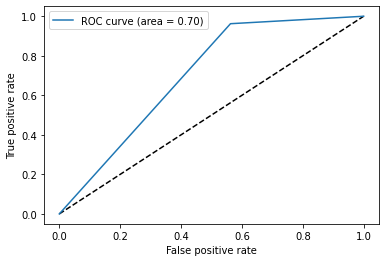

In [484]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_lr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred_lr))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

2.Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on

Precision ,Recall & F1 Score ,AUROC

In [469]:
rf = RandomForestClassifier(random_state = 92)

max_depth = [30, 20, 75, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 


hyperF = dict( max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 3)
bestF = gridF.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [470]:
y_pred_rf = bestF.predict(X_test)
y_pred_rf

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [472]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch for Random Forest Classification Model-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy :", accuracy_score(Y_test, y_pred))
print("Precision :", precision_score(Y_test, y_pred))
print ("Recall :", recall_score(Y_test, y_pred))
print ("F1 Score :", f1_score(Y_test, y_pred))


----Parameter tuning using GridSearch for Random Forest Classification Model-----
Confusion Matrix
[[23 25]
 [ 7 99]]
Accuracy : 0.7922077922077922
Precision : 0.7983870967741935
Recall : 0.9339622641509434
F1 Score : 0.8608695652173912


In [473]:
roc_auc_score(Y_test,y_pred_rf)

0.6998820754716981

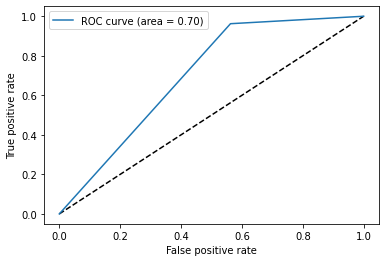

In [474]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_rf)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

----- Use One hot Encoder as encoding technique on feature , predict using the below algorithms ----

In [0]:
df_ohe = loan_df.copy()

In [0]:
cat_cols

['Gender',
 'Credit_History',
 'Self_Employed',
 'Loan_ID',
 'Property_Area',
 'Education',
 'Loan_Amount_Term',
 'Married',
 'Dependents']

In [0]:
for j in cat_cols :
   df_ohe = pd.get_dummies(df_ohe, columns=[j], prefix=[j] )
df_ohe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Credit_History_0.0,Credit_History_1.0,Self_Employed_No,Self_Employed_Yes,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,Loan_ID_LP001014,Loan_ID_LP001018,Loan_ID_LP001020,Loan_ID_LP001024,Loan_ID_LP001027,Loan_ID_LP001028,Loan_ID_LP001029,Loan_ID_LP001030,Loan_ID_LP001032,Loan_ID_LP001034,Loan_ID_LP001036,Loan_ID_LP001038,Loan_ID_LP001041,Loan_ID_LP001043,Loan_ID_LP001046,Loan_ID_LP001047,Loan_ID_LP001050,Loan_ID_LP001052,Loan_ID_LP001066,Loan_ID_LP001068,Loan_ID_LP001073,Loan_ID_LP001086,Loan_ID_LP001087,Loan_ID_LP001091,...,Loan_ID_LP002940,Loan_ID_LP002941,Loan_ID_LP002943,Loan_ID_LP002945,Loan_ID_LP002948,Loan_ID_LP002949,Loan_ID_LP002950,Loan_ID_LP002953,Loan_ID_LP002958,Loan_ID_LP002959,Loan_ID_LP002960,Loan_ID_LP002961,Loan_ID_LP002964,Loan_ID_LP002974,Loan_ID_LP002978,Loan_ID_LP002979,Loan_ID_LP002983,Loan_ID_LP002984,Loan_ID_LP002990,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Education_Graduate,Education_Not Graduate,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,5849.0,0.0,128.00,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
1,4583.0,1508.0,128.00,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2,3000.0,0.0,77.84,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3,2583.0,2358.0,120.00,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
4,6000.0,0.0,141.00,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0


In [0]:
df_ohe.shape

(614, 644)

3.Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df_ohe, df_target, test_size=0.25, random_state=42 , stratify=df_target)

In [0]:
print("Train Feature set:\t"+str(len(X_train)))
print("Train Label Feature set:\t"+str(len(Y_train)))
print("Test Feature set:\t"+str(len(X_test)))
print("Test label set:\t"+str(len(Y_test)))

Train Feature set:	460
Train Label Feature set:	460
Test Feature set:	154
Test label set:	154


In [476]:
#Stratified Sampling
print("For Training Data :")
print(Y_train['Loan_Status'].value_counts())
label_1,label_0 = Y_train['Loan_Status'].value_counts()
print("Label 1 class Percentage: "+str((label_1*100)/Y_train['Loan_Status'].count()))
print("Label 0 class Percentage: "+str((label_0*100)/Y_train['Loan_Status'].count()))
print("\nFor Test Set :")
print(Y_test['Loan_Status'].value_counts())
label_1,label_0 = Y_test['Loan_Status'].value_counts()
print("Label 1 class Percentage: "+str((label_1*100)/Y_test['Loan_Status'].count()))
print("Label 0 class Percentage: "+str((label_0*100)/Y_test['Loan_Status'].count()))

For Training Data :
1    316
0    144
Name: Loan_Status, dtype: int64
Label 1 class Percentage: 68.69565217391305
Label 0 class Percentage: 31.304347826086957

For Test Set :
1    106
0     48
Name: Loan_Status, dtype: int64
Label 1 class Percentage: 68.83116883116882
Label 0 class Percentage: 31.16883116883117


3.Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC

In [444]:
clf_lr_ohe = LogisticRegression(random_state = 89)
clf_lr_ohe.fit(X_train, Y_train)
print(clf_lr_ohe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=89, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [445]:
y_pred_ohelr = clf_lr_ohe.predict(X_test)
y_pred_ohelr

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [466]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch for Logistic Regression Model-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy :", accuracy_score(Y_test, y_pred_ohelr))
print("Precision :", precision_score(Y_test, y_pred_ohelr))
print ("Recall :", recall_score(Y_test, y_pred_ohelr))
print ("F1 Score :", f1_score(Y_test, y_pred_ohelr))

----Parameter tuning using GridSearch for Logistic Regression Model-----
Confusion Matrix
[[23 25]
 [ 7 99]]
Accuracy : 0.7922077922077922
Precision : 0.7890625
Recall : 0.9528301886792453
F1 Score : 0.8632478632478633


In [467]:
roc_auc_score(Y_test,y_pred_ohelr)

0.6951650943396226

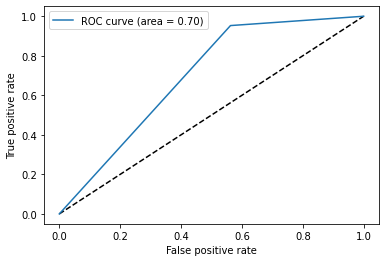

In [468]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_ohelr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred_ohelr))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

4.Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC

In [459]:
clf_rfohe = RandomForestClassifier()
param_grid = {
   'n_estimators':list(range(10,101,10)),
   'max_features':['sqrt','log2'],
   'max_depth':[10,30,50,45],
   'criterion':['gini','entropy']}
CV_rfohe = GridSearchCV(estimator=clf_rfohe, param_grid=param_grid, cv= 5,verbose=True)
CV_rfohe.fit(X_train, Y_train)
clf_best_rfohe = CV_rfohe.best_estimator_
print(clf_best_rfohe)
y_pred_rfohe = clf_best_rfohe.predict(X_test)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selectio

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  1.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [462]:
y_pred_rfohe

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [477]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch for Random Forest Classification Model-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred_rfohe))
print("Accuracy :", accuracy_score(Y_test, y_pred_rfohe))
print("Precision :", precision_score(Y_test, y_pred_rfohe))
print ("Recall :", recall_score(Y_test, y_pred_rfohe))
print ("F1 Score :", f1_score(Y_test, y_pred_rfohe))

----Parameter tuning using GridSearch for Random Forest Classification Model-----
Confusion Matrix
[[23 25]
 [ 7 99]]
Accuracy : 0.7922077922077922
Precision : 0.7983870967741935
Recall : 0.9339622641509434
F1 Score : 0.8608695652173912


In [464]:
roc_auc_score(Y_test,y_pred_rfohe)

0.706564465408805

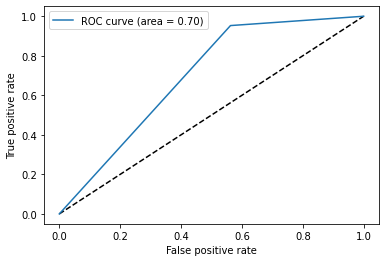

In [465]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_ohelr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred_ohelr))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

Which approach between Label Encoding & One Hot Encoding gave better results in case of both the algorithms used ?


Both the approaches provide almost same result. But, One Hot Encoder gives slightly accurate results than Label Encoding.